# Assignment: Data Wrangling
### `! git clone https://github.com/ds3001f25/wrangling_assignment.git`
### Do Q1 and Q2
### Reading material: `tidy_data.pdf`

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `./data/mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Is this a concern? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing?
3. Dummy variable: For the pretrial data covered in the lecture `./data/justice_data.parquet`, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks (Hint: `GSAF5.xls`).

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work.
2. Drop any columns that do not contain data.
3. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
4. Clean the Age variable and make a histogram of the ages of the victims.
5. What proportion of victims are male?
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Are sharks more likely to launch unprovoked attacks on men or women? Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Is it more or less likely to be fatal when the victim is male or female? How do you feel about sharks?
9. What proportion of attacks appear to be by white sharks? (Hint: `str.split()` makes a vector of text values into a list of lists, split by spaces.)

In [ ]:
! git clone https://github.com/ds3001f25/wrangling_assignment.git

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#1 Airbnb Data

#Loading in the airbnb dataset
airbnb_data = pd.read_csv('./data/airbnb_hw.csv', low_memory=False)

#Cleaning the Airbnb Price Data
airbnb_data['Price'] = airbnb_data['Price'].str.replace(r'[$,]', '', regex=True)
airbnb_data['Price'] = pd.to_numeric(airbnb_data['Price'], errors='coerce')

print(airbnb_data['Price'].describe())
print("Missing Values:", airbnb_data['Price'].isnull().sum())

count    30478.000000
mean       163.589737
std        197.785454
min         10.000000
25%         80.000000
50%        125.000000
75%        195.000000
max      10000.000000
Name: Price, dtype: float64
Missing Values: 0


Cleaned the price variable for the Aribnb Data. To do this I removed the "$" and the "," then coerced the numeric. After doing so, there were 0 missing values. The dataset had consistent formatting, resulting in 0 invalid entries were present in the price column.




In [36]:
#2 Police Data

police_data = pd.read_csv("./data/mn_police_use_of_force.csv")

#Clean variable subject_injury
police_data['subject_injury'] = police_data['subject_injury'].replace([' ', 'NA', 'nan'], np.nan)
police_data['subject_injury'] = police_data['subject_injury'].str.strip().str.title()

# Finding the Missing proportion
print("Proportion missing:", police_data['subject_injury'].isnull().mean())

#Creating a cross-tabulation with force_type
print(pd.crosstab(police_data['subject_injury'], police_data['force_type']))

Proportion missing: 0.7619342359767892
force_type      Baton  Bodily Force  Chemical Irritant  Firearm  \
subject_injury                                                    
No                  0          1093                131        2   
Yes                 2          1286                 41        0   

force_type      Gun Point Display  Improvised Weapon  Less Lethal Projectile  \
subject_injury                                                                 
No                             33                 34                       1   
Yes                            44                 40                       2   

force_type      Police K9 Bite  Taser  
subject_injury                         
No                           2    150  
Yes                         44    172  


After cleaning the subject_injuryt variable by standardizing entries to "Yes" and "No" and replacing blanks with NaN, about 76% of the data is missing.

Looking at the cross-tabulation, the most frequent injuries were bodily force, taser use, and K9 bites, whereas injuries from chemical irritants and firearms were much less common.


In [40]:
#3 Dummy Variable

pretrial_data = pd.read_parquet("./data/justice_data.parquet")

var = "WhetherDefendantWasReleasedPretrial"
pretrial_data[var] = pretrial_data[var].replace([9,99],np.nan)


I attempted to replace the codes 9 and 99 with NaN so that the variable would indicate 0 for not released, 1 for released, and NaN for missing values. In this dataset, however, the column only contained 0s and 1s, so there were no 9s or 99s to replace, and the values remained unchanged.

In [41]:
#4 Missing Values

pd.crosstab(pretrial_data['ImposedSentenceAllChargeInContactEvent'].isnull(),
            pretrial_data['SentenceTypeAllChargesAtConvictionInContactEvent'])

SentenceTypeAllChargesAtConvictionInContactEvent,0,1,2,4,9
ImposedSentenceAllChargeInContactEvent,,,,,
False,8720,4299,914,8779,274


The cross-tabulation shows that ImposedSentenceAllChargeInContactEvent is often missing when no sentence was imposed.

In [44]:
from google.colab import files
uploaded = files.upload()

Saving GSAF5.xls to GSAF5 (2).xls
(7042, 23)


,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,16th August 2025,2025.0,Provoked,USA,Florida,Cayo Costa Boca Grande,Fishing,Shawn Meuse,M,?,...,Lemon shark 1.8 m (6ft),Johannes Marchand: Kevin McMurray Trackingshar...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,18th August,2025.0,Unprovoked,Australia,NSW,Cabarita Beach,Surfing,Brad Ross,M,?,...,5m (16.5ft) Great White,Bob Myatt GSAF The Guardian: 9 News: ABS News:...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,17th August,2025.0,Unprovoked,Bahamas,Atlantic Ocean near Big Grand Cay,North of Grand Bahama near Freeport,Spearfishing,Not stated,M,63,...,Undetermined,Ralph Collier GSAF and Kevin MCMurray Tracking...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7th August,2025.0,Unprovoked,Australia,NSW,Tathra Beach,Surfing,Bowie Daley,M,9,...,Suspected Great White,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1st August,2025.0,Unprovoked,Puerto Rico,Carolina,Carolina Beach,Wading,Eleonora Boi,F,39,...,Undetermined,Kevin McMurray Trackingsharks.com: NY Post,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

sharks_data = pd.read_excel("GSAF5.xls")

#Drop the empty columns
sharks_data = sharks_data.dropna(axis=1, how='all')

print(sharks_data.shape)
sharks_data.head()

(7042, 23)


,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,16th August 2025,2025.0,Provoked,USA,Florida,Cayo Costa Boca Grande,Fishing,Shawn Meuse,M,?,...,Lemon shark 1.8 m (6ft),Johannes Marchand: Kevin McMurray Trackingshar...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,18th August,2025.0,Unprovoked,Australia,NSW,Cabarita Beach,Surfing,Brad Ross,M,?,...,5m (16.5ft) Great White,Bob Myatt GSAF The Guardian: 9 News: ABS News:...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,17th August,2025.0,Unprovoked,Bahamas,Atlantic Ocean near Big Grand Cay,North of Grand Bahama near Freeport,Spearfishing,Not stated,M,63,...,Undetermined,Ralph Collier GSAF and Kevin MCMurray Tracking...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7th August,2025.0,Unprovoked,Australia,NSW,Tathra Beach,Surfing,Bowie Daley,M,9,...,Suspected Great White,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1st August,2025.0,Unprovoked,Puerto Rico,Carolina,Carolina Beach,Wading,Eleonora Boi,F,39,...,Undetermined,Kevin McMurray Trackingsharks.com: NY Post,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


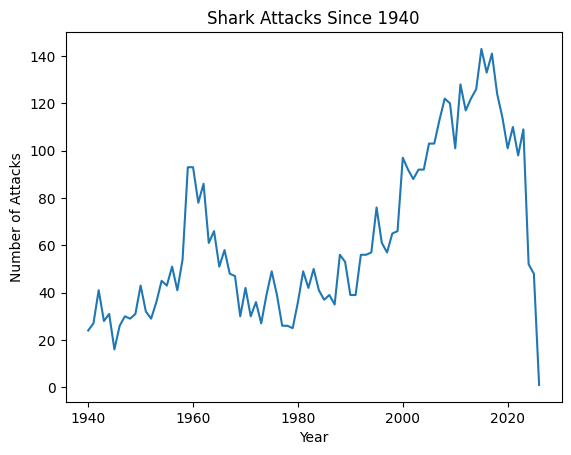

In [46]:
#Year to numeric
sharks_data['Year'] = pd.to_numeric(sharks_data['Year'], errors='coerce')

#Filtering and identifying the shark attacks since the 40s
sharks_data_recent = sharks_data[sharks_data['Year'] >= 1940]

#Trends
sharks_data_recent['Year'].value_counts().sort_index().plot(kind='line')
plt.title("Shark Attacks Since 1940")
plt.xlabel("Year")
plt.ylabel("Number of Attacks")
plt.show()

The line graph shows that there has been an increased trend of attacks over time since the 1940s with a steep falloff during COVID most likely due to individuals staying at home.



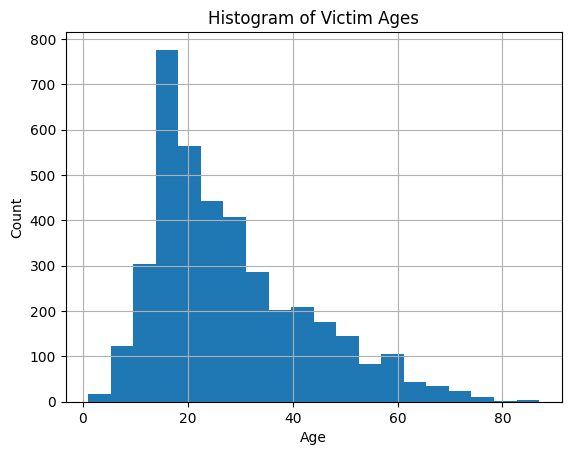

In [47]:
#Cleaning Age Variable
def clean_age(x):
    if pd.isnull(x): return np.nan
    x = str(x).strip()
    if x.isdigit(): return int(x)
    if "teen" in x.lower(): return 15
    if "20" in x: return 25
    if "30" in x: return 35
    return np.nan
sharks_data['Age_clean'] = sharks_data['Age'].apply(clean_age)

#Age Breakdown
sharks_data['Age_clean'].hist(bins=20)
plt.title("Histogram of Victim Ages")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

It can be seen that most attack victims are ages late teens to mid 30s.

In [49]:
#Cleaning up the Sex Column
sharks_data['Sex'] = sharks_data['Sex'].str.strip().str.upper()

#Males victims to shark attacks
prop_male_attacks = (sharks_data['Sex'] == 'M').mean()
print("Proportion male:", prop_male_attacks)


Proportion male: 0.8026128940641863


Around 80.2% of males are victims to shark attacks.

In [50]:
#Cleaning the variable (provoked, unprovoked, unknwon)
sharks_data['Type'] = sharks_data['Type'].str.strip().str.title()
sharks_data['Type'] = sharks_data['Type'].where(sharks_data['Type'].isin(['Provoked','Unprovoked']), 'Unknown')

print(sharks_data['Type'].value_counts(normalize=True))

Type
Unprovoked    0.738001
Unknown       0.170974
Provoked      0.091025
Name: proportion, dtype: float64


Around 74% of shark attacks are unprovoked.



In [51]:
#Cleaning the Fatality Variable
sharks_data['Fatal_clean'] = sharks_data['Fatal Y/N'].str.upper().str.strip()
sharks_data['Fatal_clean'] = sharks_data['Fatal_clean'].where(sharks_data['Fatal_clean'].isin(['Y','N']), 'Unknown')
print(sharks_data['Fatal_clean'].value_counts(normalize=True))

Fatal_clean
N          0.698239
Y          0.210452
Unknown    0.091309
Name: proportion, dtype: float64


Aproximately 21% of shark attacks end in fatality.



In [52]:
#Gender vs Fatality Type

#Unprovoked fatality by gender (males vs females)
print(pd.crosstab(sharks_data['Type'], sharks_data['Sex'], normalize='columns'))

#Type of fatality
print(pd.crosstab(sharks_data['Fatal_clean'], sharks_data['Type'], normalize='columns'))

#Fatality by gender
print(pd.crosstab(sharks_data['Fatal_clean'], sharks_data['Sex'], normalize='columns'))



Sex           .         F  LLI         M  M X 2    N
Type                                                
Provoked    0.0  0.038462  0.0  0.097311    0.0  0.5
Unknown     1.0  0.114144  0.0  0.133935    1.0  0.5
Unprovoked  0.0  0.847395  1.0  0.768754    0.0  0.0
Type         Provoked   Unknown  Unprovoked
Fatal_clean                                
N            0.953198  0.372924    0.742159
Unknown      0.014041  0.460963    0.015201
Y            0.032761  0.166113    0.242640
Sex            .         F  LLI         M  M X 2    N
Fatal_clean                                          
N            0.0  0.761787  1.0  0.697275    0.0  0.5
Unknown      0.0  0.086849  0.0  0.081387    1.0  0.0
Y            1.0  0.151365  0.0  0.221338    0.0  0.5


Looking across the three categories it appears that sharks are more likely to carry out unprovoked attacks on men. Men are also slightly more likely than women to die from shark attacks. Unprovoked attacks tend to be more deadly than provoked ones.


In [53]:
#White shark attacks
sharks_data['Species_clean'] = sharks_data['Species '].str.lower().fillna("").str.split()
sharks_data['White_Shark'] = sharks_data['Species_clean'].apply(lambda words: "white" in words)

prop_white = sharks_data['White_Shark'].mean()
print("Proportion of white shark attacks:", prop_white)

Proportion of white shark attacks: 0.10096563476285146


About 10% of attacks are by white sharks.